In [41]:
# importing packages and other items used
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import display_html, HTML
%matplotlib inline
conn = sqlite3.connect('MLB_Data.db')

In [42]:
# allows tables to be printed side by side.. i.e. comparing between LHP/RHP
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table', 
            'table style="display:inline"'),raw=True)

In [43]:
# assigning CSV files to functions
averageLHP=pd.read_csv("MLB_vs_LHP_2017")
averageRHP=pd.read_csv("MLB_vs_RHP_2017")

In [44]:
# setting league averages for each option
leagueAVGRHP = 0.254867
leagueRunAvgRHP = 1.854
leagueAVGLHP = 0.255
leagueRunAvgLHP = 1.956

In [45]:
# set func with total runs scored against each Pitcher
RHPruns = sum(averageRHP['R'])
RHPab = sum(averageRHP['AB'])
RHPavg = RHPab/RHPruns
LHPruns = sum(averageLHP['R'])
LHPab = sum(averageLHP['AB'])
LHPavg = LHPab/LHPruns

In [46]:
display_side_by_side(teamsAVGvsLHP.describe(), teamsAVGvsRHP.describe())

,AVG,OBP,SLG
count,30.000000,30.000000,30.000000
mean,0.255000,0.326267,0.418800
std,0.015559,0.015620,0.031553
min,0.226000,0.294000,0.343000
25%,0.244000,0.313750,0.396750
50%,0.253000,0.325500,0.416500
75%,0.266250,0.339000,0.439750
max,0.281000,0.353000,0.492000
,AVG,OBP,SLG
count,30.000000,30.000000,30.000000


In [47]:
display_side_by_side(MLBvsLHP.describe(), MLBvsRHP.describe())

,AVG,H,R,RunRatio
count,30.000000,30.000000,30.000000,30.000000
mean,0.255000,361.600000,185.933333,1.956333
std,0.015559,46.749221,28.979105,0.137627
min,0.226000,298.000000,143.000000,1.750000
25%,0.244000,327.500000,168.250000,1.860000
50%,0.253000,359.000000,179.500000,1.960000
75%,0.266250,386.500000,199.500000,2.030000
max,0.281000,520.000000,280.000000,2.340000
,AVG,H,R,RunRatio
count,30.000000,30.000000,30.000000,30.000000


In [48]:
# sets up table displaying a teams AVG to RUNS ratio
teamsRunsvsAVGLHP = averageLHP[['TEAM', 'AVG','H', 'R']]
teamsRunsvsAVGRHP = averageRHP[['TEAM', 'AVG', 'H', 'R']]

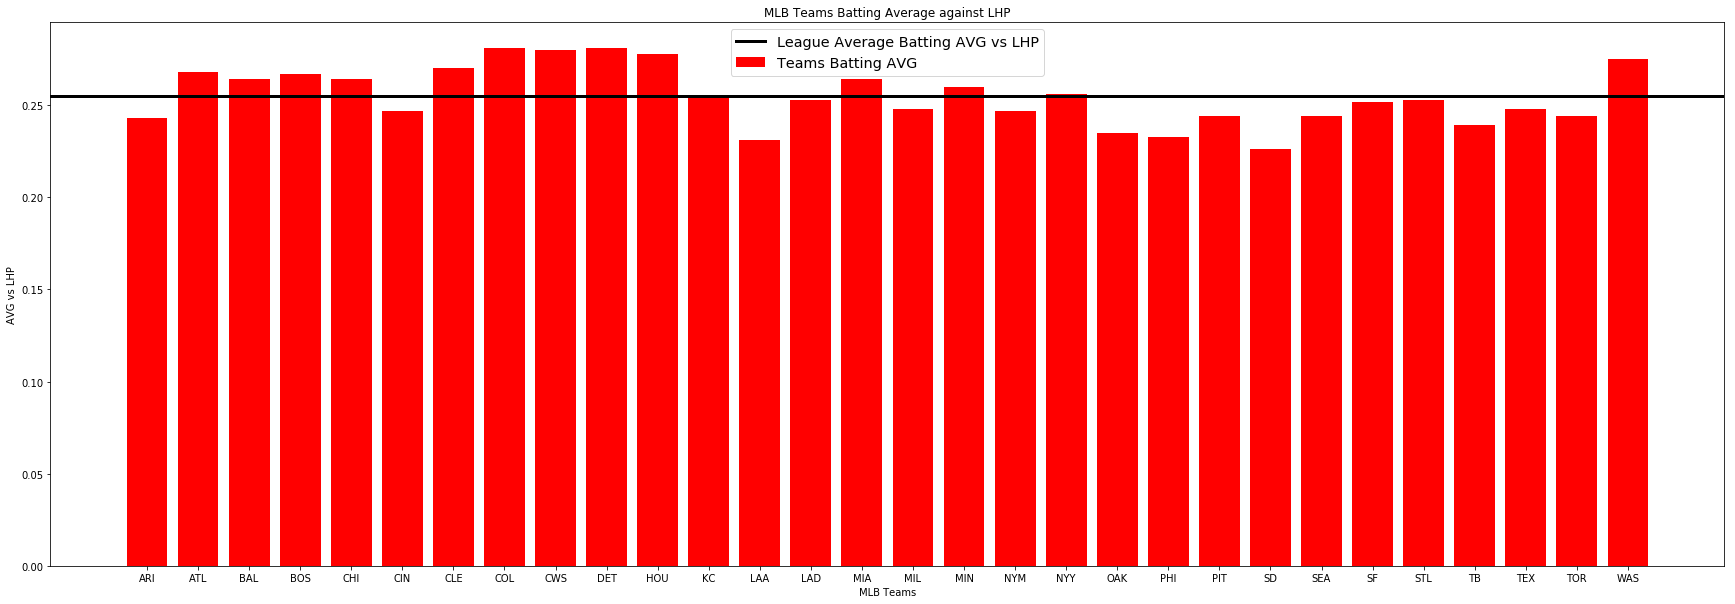

In [49]:
# creates BAR GRAPH for averages against LHP  
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#---------------------------------------------------------------#
sql_teamsAVGvsLHP = "SELECT TEAM, AVG, OBP, SLG FROM MLB_vs_LHP_2017"
teamsAVGvsLHP = pd.read_sql_query(sql_teamsAVGvsLHP, conn)
#---------------------------------------------------------------#
plt.figure(figsize=(30, 10))
plt.title('MLB Teams Batting Average against LHP')
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs LHP')
plt.axhline(leagueAVGLHP, color='k', lw='3', ls='-',
           label='League Average Batting AVG vs LHP')
plt.bar(teamsAVGvsLHP['TEAM'], teamsAVGvsLHP['AVG'], color='r', label='Teams Batting AVG')
plt.legend(fontsize='x-large')

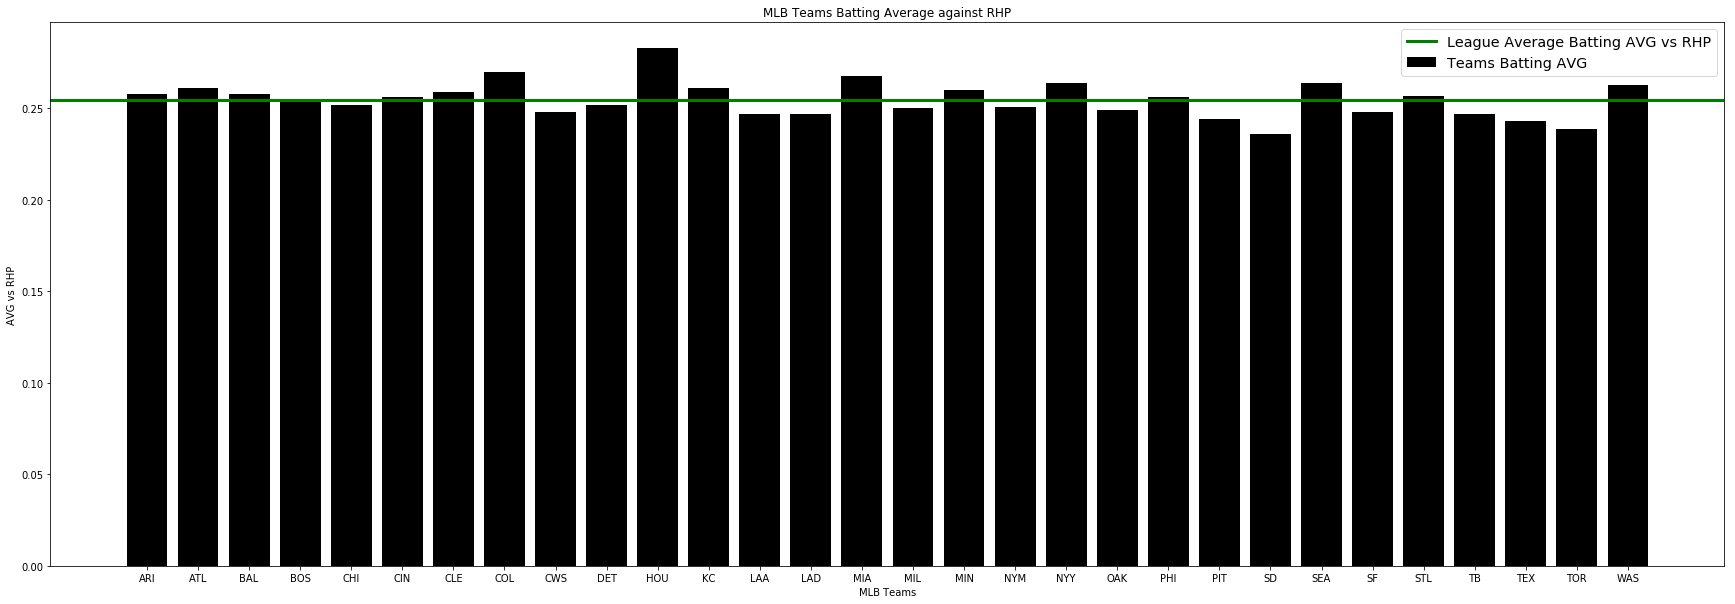

In [50]:
# creates BAR GRAPH for averages against RHP
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#---------------------------------------------------------------------#
sql_teamsAVGvsRHP = "SELECT TEAM, AVG, OBP, SLG FROM MLB_vs_RHP_2017"
teamsAVGvsRHP = pd.read_sql_query(sql_teamsAVGvsRHP, conn)
#---------------------------------------------------------------------#
plt.figure(figsize=(30, 10))
plt.title('MLB Teams Batting Average against RHP')
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs RHP')
plt.axhline(leagueAVGRHP, color='g', lw='3', ls='-',
           label='League Average Batting AVG vs RHP')
plt.bar(teamsAVGvsRHP['TEAM'], teamsAVGvsRHP['AVG'], color='k', label='Teams Batting AVG')
plt.legend(fontsize='x-large')

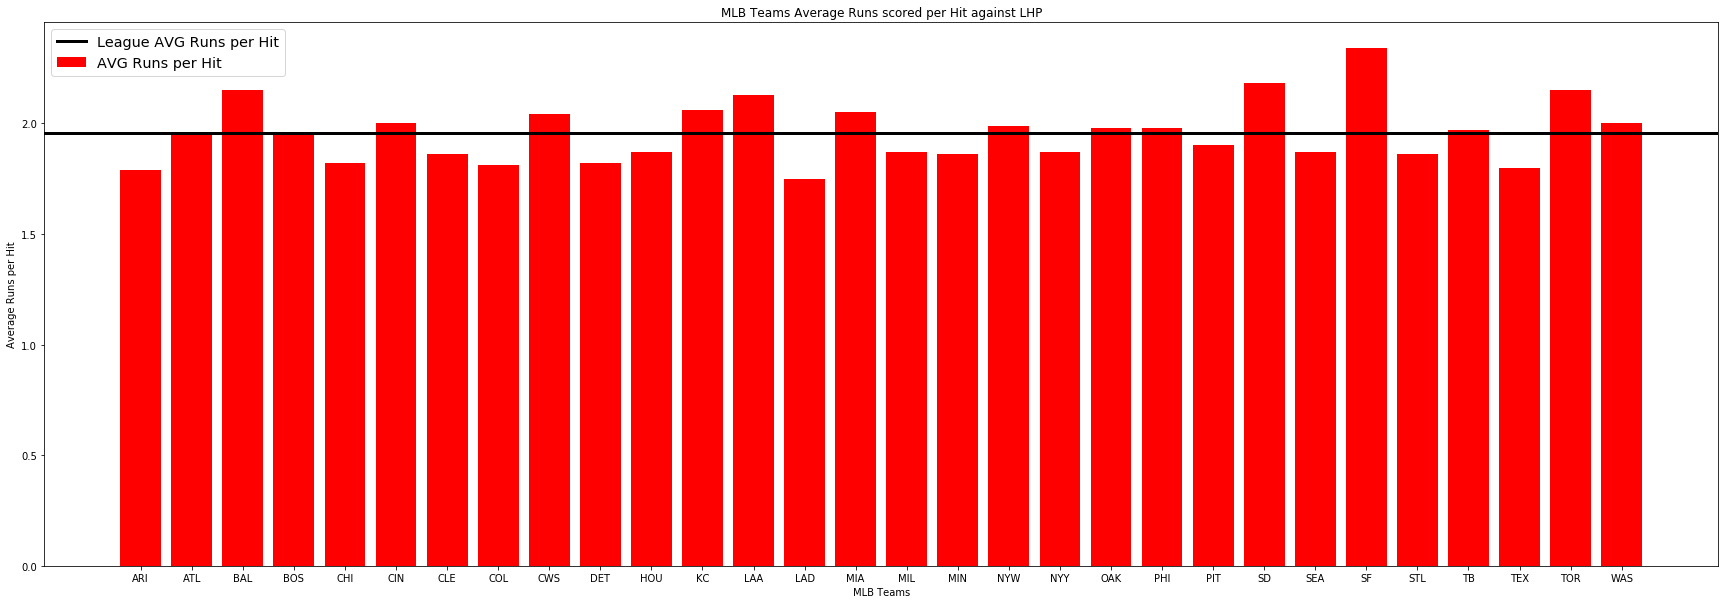

In [51]:
# bar graph comparing teams average runs per hit against the leagues average against LHP
conn =sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-----------------------------------------------#
sql_MLBvsLHP = "SELECT * FROM MLBvsLHP"
MLBvsLHP = pd.read_sql_query(sql_MLBvsLHP, conn)
#-----------------------------------------------#
plt.figure(figsize=(30, 10))
plt.title('MLB Teams Average Runs scored per Hit against LHP')
plt.xlabel('MLB Teams')
plt.ylabel('Average Runs per Hit')
plt.axhline(leagueRunAvgLHP, color='k', lw='3', ls='-', label='League AVG Runs per Hit')
plt.bar(MLBvsLHP['TEAM'], MLBvsLHP['RunRatio'], color='r', label='AVG Runs per Hit')
plt.legend(fontsize='x-large', loc='upper left')

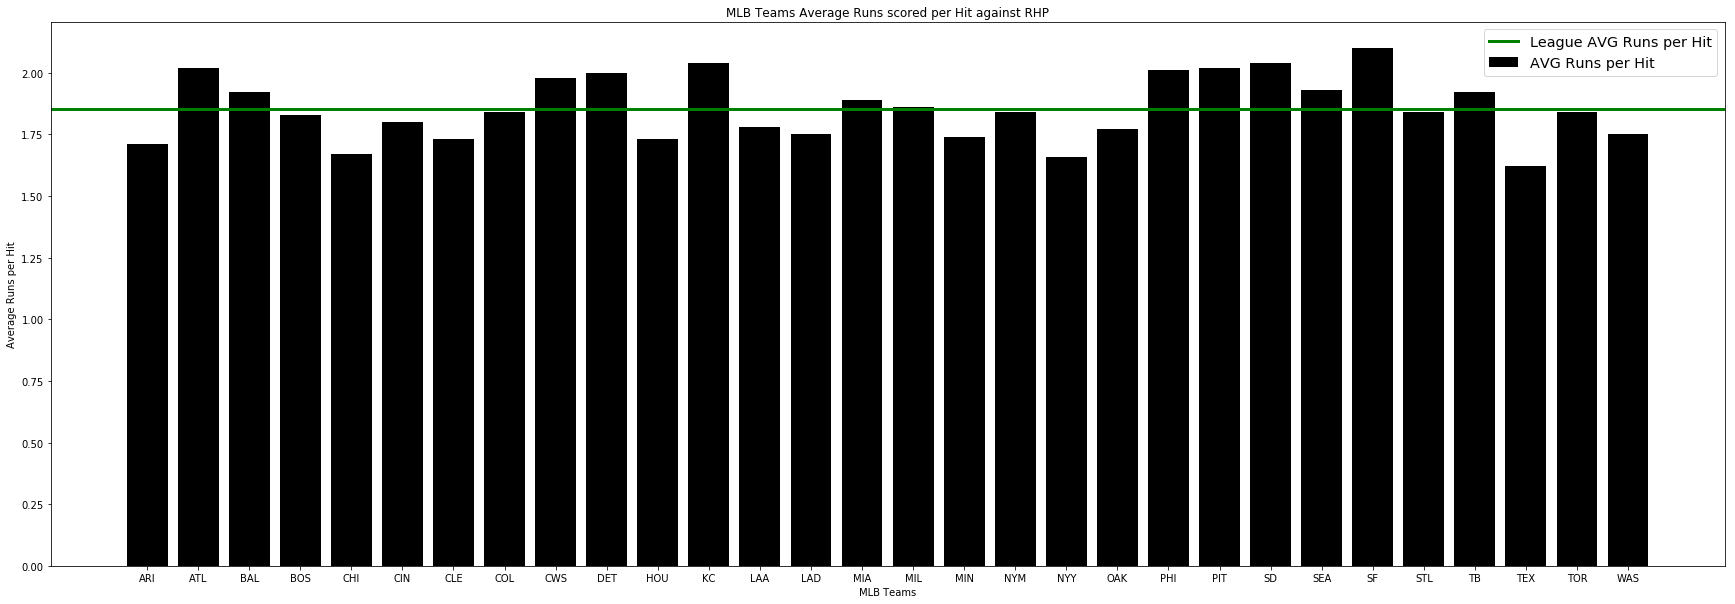

In [52]:
# bar graph comparing teams average runs per hit against the leagues average against RHP
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-----------------------------------------------#
sql_MLBvsRHP = "SELECT * FROM MLBvsRHP"
MLBvsRHP = pd.read_sql_query(sql_MLBvsRHP, conn)
#-----------------------------------------------#
plt.figure(figsize=(30, 10))
plt.title('MLB Teams Average Runs scored per Hit against RHP')
plt.xlabel('MLB Teams')
plt.ylabel('Average Runs per Hit')
plt.axhline(leagueRunAvgRHP, color='g', lw='3', ls='-', label='League AVG Runs per Hit')
plt.bar(MLBvsRHP['TEAM'], MLBvsRHP['RunRatio'], color='k', label='AVG Runs per Hit')
plt.legend(fontsize='x-large')

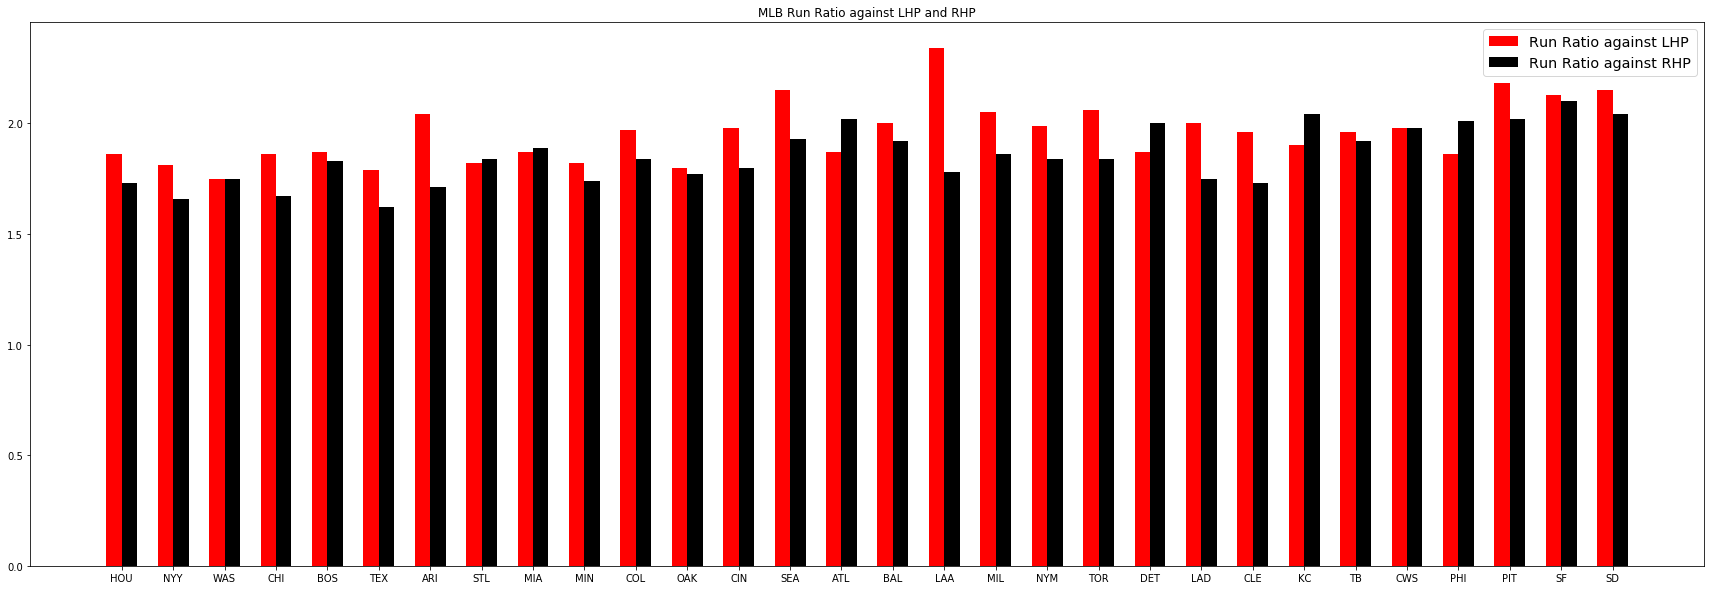

In [53]:
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()
#-------------------------------------#
plt.figure(figsize=(30, 10))
ax = plt.subplot()
N = 30
w = 0.3

ind = np.arange(N)

LHP = ax.bar(ind, MLBvsLHP['RunRatio'], w, color='r', label="Run Ratio against LHP")
RHP = ax.bar(ind + w, MLBvsRHP['RunRatio'], w, color='k', label="Run Ratio against RHP")

ax.set_xticks(ind + w / 2)
ax.set_xticklabels(MLBvsRHP['TEAM'])
plt.title('MLB Run Ratio against LHP and RHP')
plt.legend(fontsize='x-large')
plt.show()

In [18]:
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()

cur.execute('''CREATE TABLE RHP_RvsAB(teams, ab, r)''')
cur.execute('''CREATE TABLE LHP_RvsAB(teams, ab, r)''')
cur.execute("INSERT INTO RHP_RvsAB VALUES ('30', '123020', '17004')")
cur.execute("INSERT INTO LHP_RvsAB VALUES ('30', '42547', '5578')")

conn.commit()
conn.close()

In [54]:
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()

sqlAvgLHP = """SELECT AB/(1.0*R) AS 'AB/R' FROM LHP_RvsAB"""
avgLHP = pd.read_sql_query(sqlAvgLHP, conn)
#--------------------------------------------------#
sqlAvgRHP = """SELECT AB/(1.0*R) AS 'AB/R' FROM RHP_RvsAB"""
avgRHP = pd.read_sql_query(sqlAvgRHP, conn)

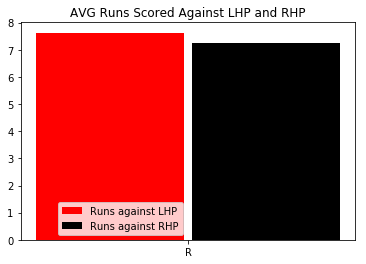

In [55]:
conn = sqlite3.connect("MLB_Data.db")
cur = conn.cursor()

ax = plt.subplot()
N = 1
w = .3

ind = np.arange(N)

LHP = ax.bar(ind, avgLHP['AB/R'], w, color='r', label='Runs against LHP')
RHP = ax.bar(ind + w*1.05, avgRHP['AB/R'], w, color='k', label='Runs against RHP')
ax.set_xticks(ind + w / 1.90)
ax.set_xticklabels(('R'))
ax.legend(loc=4, bbox_to_anchor=(0.5, 0))

plt.title('AVG Runs Scored Against LHP and RHP')
plt.show()

#ax.bar(h, SumvsLHP, width=w, color='r', align='center')
#ax.bar(h-w*1.05, SumvsRHP, width=w, color='g', align='center')F